***1st Answer***


1. Implementing a perceptron model to realize AND gate. Start with the weights
as [0.5, 0.5]. Update the weights using perceptron learning algorithm.
2. Printint the
model parameters after every epoch. Use suitable learning rate.




In [22]:
import numpy as np

# Learning rate value
eta = 0.1

# Defining inputs and outputs for the AND gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 0, 0, 1])

# Initializing weights
weights = np.array([0.5, 0.5])
bias = 0.0

# Loop for multiple epochs
epochs = 20  # number of epochs
for epoch in range(epochs):
    # Iterating through each data point
    for i in range(len(inputs)):
        # Calculating weighted sum
        z = np.dot(weights, inputs[i]) + bias

        # Activation function (step function)
        predicted_output = 1 if z > 0 else 0

        # Error calculation
        error = outputs[i] - predicted_output

        # Updating weights
        weights += eta * error * inputs[i]
        bias += eta * error

    # Printing model parameters after each epoch
    print(f"Epoch {epoch + 1}: Weights = {weights}, Bias = {bias}")

print("\n")
# Printing final prediction for all inputs
for i in range(len(inputs)):
    z = np.dot(weights, inputs[i]) + bias
    predicted_output = 1 if z > 0 else 0
    print(f"Input: {inputs[i]}, Predicted Output: {predicted_output}")




Epoch 1: Weights = [0.4 0.4], Bias = -0.2
Epoch 2: Weights = [0.3 0.3], Bias = -0.4
Epoch 3: Weights = [0.3 0.3], Bias = -0.4
Epoch 4: Weights = [0.3 0.3], Bias = -0.4
Epoch 5: Weights = [0.3 0.3], Bias = -0.4
Epoch 6: Weights = [0.3 0.3], Bias = -0.4
Epoch 7: Weights = [0.3 0.3], Bias = -0.4
Epoch 8: Weights = [0.3 0.3], Bias = -0.4
Epoch 9: Weights = [0.3 0.3], Bias = -0.4
Epoch 10: Weights = [0.3 0.3], Bias = -0.4
Epoch 11: Weights = [0.3 0.3], Bias = -0.4
Epoch 12: Weights = [0.3 0.3], Bias = -0.4
Epoch 13: Weights = [0.3 0.3], Bias = -0.4
Epoch 14: Weights = [0.3 0.3], Bias = -0.4
Epoch 15: Weights = [0.3 0.3], Bias = -0.4
Epoch 16: Weights = [0.3 0.3], Bias = -0.4
Epoch 17: Weights = [0.3 0.3], Bias = -0.4
Epoch 18: Weights = [0.3 0.3], Bias = -0.4
Epoch 19: Weights = [0.3 0.3], Bias = -0.4
Epoch 20: Weights = [0.3 0.3], Bias = -0.4


Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1


***2nd Question***


1. Q2. The RT-IoT2022, a proprietary dataset derived from a real-time IoT
infrastructure, is introduced as a comprehensive resource integrating a diverse
range of IoT devices and sophisticated network attack methodologies. This
dataset encompasses both normal and adversarial network behaviours, providing
a general representation of real-world scenarios. Incorporating data from IoT
devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as
simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks
using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed
perspective on the complex nature of network traffic. The bidirectional attributes
of network traffic are meticulously captured using the Zeek network monitoring
tool and the Flowmeter plugin. Researchers can leverage the RT-IoT2022 dataset
to advance the capabilities of Intrusion Detection Systems (IDS), fostering the
development of robust and adaptive security solutions for real-time IoT networks.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   no                        123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

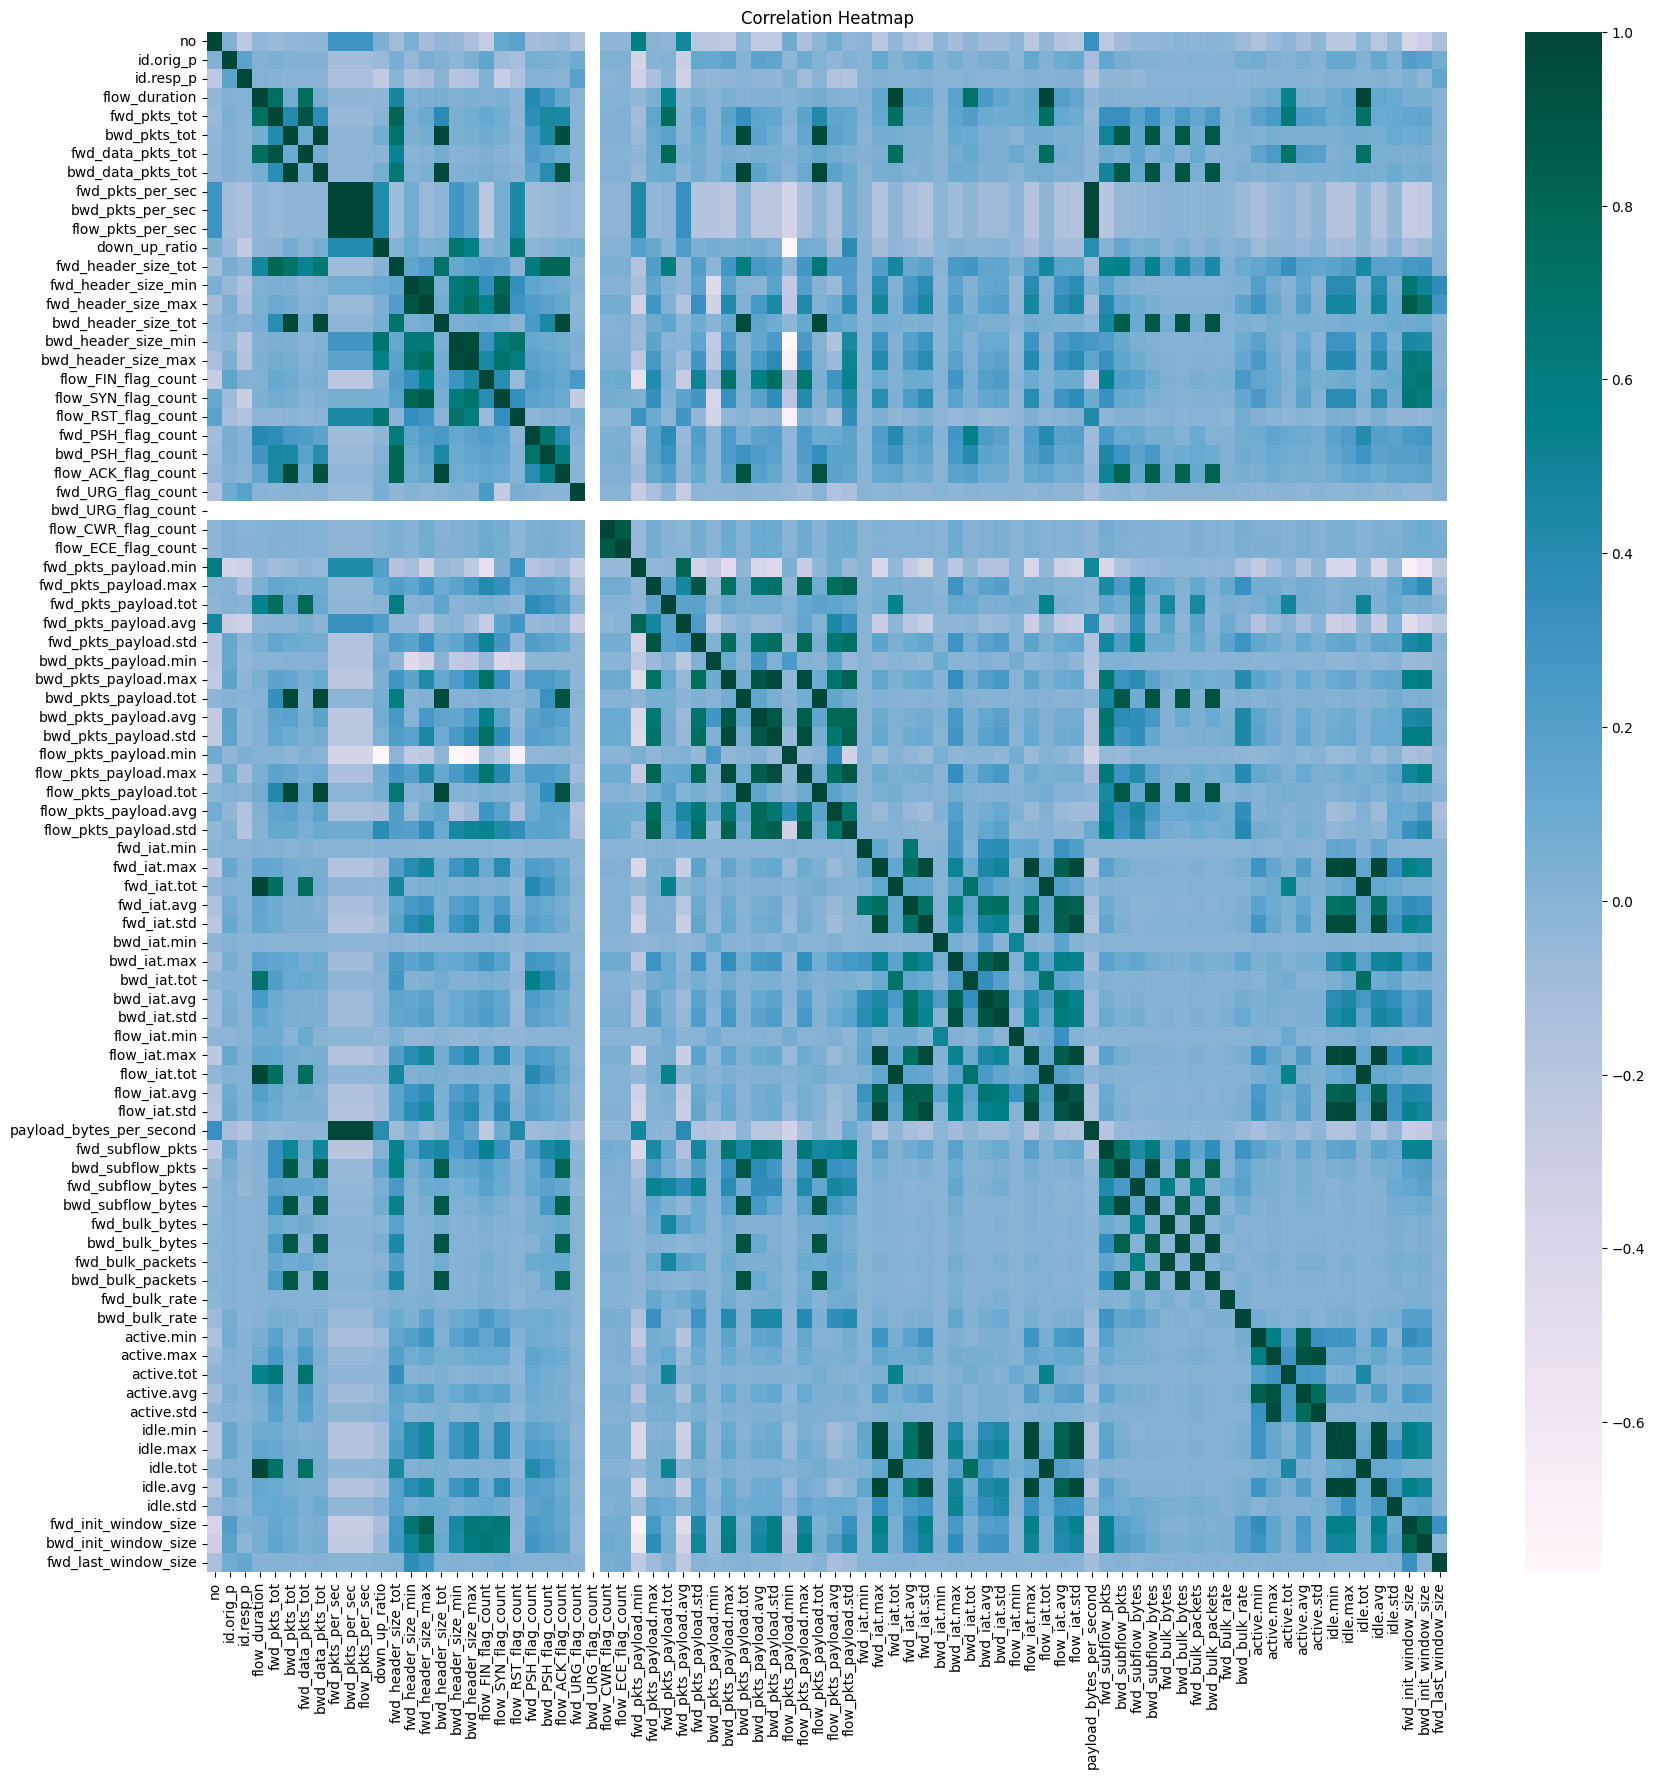






Accuracy:  0.9956140350877193

So We got 99.56% Accuracy Using MLP Classifier.


Kaggle Submission Link: 


In [25]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Function to preprocess data
def preprocess_data(df):
    # Droping unnecessary columns
    # Drop Unnecessary Columns: The function preprocess_data drops unnecessary columns from the dataset.
    # In this case, columns 'no' and 'Attack_type' are dropped.

    X = df.drop(columns=['no','Attack_type'])
    y = df['Attack_type']

    # Encoding categorical variables
    # Encode Categorical Variables: Categorical variables 'proto' and 'service' are encoded using LabelEncoder...
    # to convert them into numeric format suitable for machine learning algorithms.

    labelencoder = LabelEncoder()
    X['proto'] = labelencoder.fit_transform(X['proto'])
    X['service'] = labelencoder.fit_transform(X['service'])

    return X, y

# Function to visualize data distribution
def visualize_data_distribution(df):

    # Printing the distribution of Attack types using countplot

    print("\n\n\n")
    figure = plt.subplots(figsize=(20,6))
    sns.countplot(data=df,x=df['Attack_type'],order=df['Attack_type'].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()
    print("\n\n\n")


    # Printing Pie chart of with respect to attack types
    colors = ['cyan', 'yellow', 'green', 'blue', 'violet', 'red', 'lime', 'skyblue', 'purple', 'gold', '#6AC9A1', '#F37167']
    plt.figure(figsize=(10, 10))
    attack_type_distribution = df['Attack_type'].value_counts(normalize=True)
    filtered_attack_types = attack_type_distribution[attack_type_distribution >= 0.001]     #Considering only those attack types which has distribution percent greater than 0.001
    filtered_attack_types.plot(kind='pie', autopct='%1.1f%%', colors=colors)
    plt.title("Pie Chart of Attack types")
    plt.show()
    print("\n\n\n")

    # Printing Correlation heatmap of numeric features
    numeric_df = df.select_dtypes(include=['number'])
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(20, 20))
    sns.heatmap(correlation_matrix, annot=False, cmap='PuBuGn')
    plt.title("Correlation Heatmap")
    plt.show()
    print("\n\n\n")

# Main function
def main():
    # Loading dataset
    df = pd.read_csv("/content/IOT.csv")
    #df = pd.read_csv("/kaggle/input/rt-iot2022real-time-internet-of-things/RT_IOT2022.csv")

    print(df.info(),df.describe(),f"data frame shape: {df.shape}",sep="\n\n")

    # Visualizing data distributions
    visualize_data_distribution(df)

    # Preprocessing data
    X, y = preprocess_data(df)

    # Splitting data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scaling features
    # Scale Features: The features are scaled using StandardScaler to standardize them to have a mean of 0 and a standard deviation of 1.
    # This ensures that all features contribute equally to the model training process.

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initializing and training MLP classifier
    # Train MLP Classifier: An MLP classifier is initialized and trained using the preprocessed and scaled features.
    # We can also use Different parameters like {size= (50,50,50) or (50,100,50) etc } {activation = tanh or relu } {solver = sgd or adam}

    mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001,
                                   learning_rate='adaptive', random_state=42)
    mlp_classifier.fit(X_train_scaled, y_train)

    # Evaluating model
    # Evaluate Model: The accuracy of the trained model is evaluated using the test data, and the accuracy score is printed.
    accuracy = accuracy_score(y_test, mlp_classifier.predict(X_test_scaled))

    # Printing the Final Accuracy
    print("\nAccuracy: ", accuracy)
    print(f"\nSo We got {round(accuracy*100,2)}% Accuracy Using MLP Classifier.\n\n")
    print("Kaggle Submission Link: ")
if __name__ == "__main__":
    main()


Kaggle Submission Link:
[link text](https://)